In [1]:
import pandas as pd 
import numpy as np
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
people_data = pd.read_csv("./data_model/people_wiki.csv")
people_data.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [3]:
brad = people_data[people_data['name'] == 'Brad Pitt']
brad['text']


24426    william bradley brad pitt born december 18 196...
Name: text, dtype: object

In [4]:
people_data['name']

0                             Digby Morrell
1                            Alfred J. Lewy
2                             Harpdog Brown
3                       Franz Rottensteiner
4                                    G-Enka
                        ...                
42781                    Motoaki Takenouchi
42782    Alan Judge (footballer, born 1960)
42783                          Eduardo Lara
42784                  Tatiana Faberg%C3%A9
42785                        Kenneth Thomas
Name: name, Length: 42786, dtype: object

In [5]:
def sortedbow(string):
    list = string.split()
    bow = {}
    for word in list:
        bow[word] = 0
    for word in list:
        bow[word] += 1 
    print (sorted (bow.items(), key=lambda x: x[1], reverse=True))

In [6]:
sortedbow(str(brad['text']))

[('24426', 1), ('william', 1), ('bradley', 1), ('brad', 1), ('pitt', 1), ('born', 1), ('december', 1), ('18', 1), ('196...', 1), ('Name:', 1), ('text,', 1), ('dtype:', 1), ('object', 1)]


In [7]:


from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
word_count = count_vectorizer.fit_transform(people_data['text'])
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(word_count)



In [8]:
brad_words_count = count_vectorizer.transform(['Brad Pitt'])
brad_tfidf = tfidf_transformer.transform(brad_words_count)
neigh = NearestNeighbors(n_neighbors=10, n_jobs=-1) 
neigh.fit(tfidf)
res = neigh.kneighbors(brad_tfidf, return_distance=False)
print (res)

[[37466 32112 37965 24426 29417 16488 13967  9480  3282  5510]]


In [9]:
for i in res: 
    print (people_data.iloc[i])

                                                     URI  \
37466          <http://dbpedia.org/resource/Warren_Pitt>   
32112  <http://dbpedia.org/resource/Charles_Redding_P...   
37965  <http://dbpedia.org/resource/Bill_Pitt_(racing...   
24426            <http://dbpedia.org/resource/Brad_Pitt>   
29417        <http://dbpedia.org/resource/Joe_Luxbacher>   
16488         <http://dbpedia.org/resource/Tim_Grgurich>   
13967  <http://dbpedia.org/resource/Brad_Williams_(co...   
9480           <http://dbpedia.org/resource/Brad_Nichol>   
3282          <http://dbpedia.org/resource/Naomi_Wilson>   
5510            <http://dbpedia.org/resource/Freddie_Fu>   

                            name  \
37466                Warren Pitt   
32112       Charles Redding Pitt   
37965  Bill Pitt (racing driver)   
24426                  Brad Pitt   
29417              Joe Luxbacher   
16488               Tim Grgurich   
13967   Brad Williams (comedian)   
9480                 Brad Nichol   
3282           

c'est pas mal le knn mais maintenant on va téma le kmeans


faire attention, c'est méga long à run mais faut le faire que 1 fois, juste pour déterminer le elbow

Finding optimal k: 100%|██████████| 5/5 [01:55<00:00, 23.04s/it]


ValueError: x and y must have same first dimension, but have shapes (19,) and (5,)

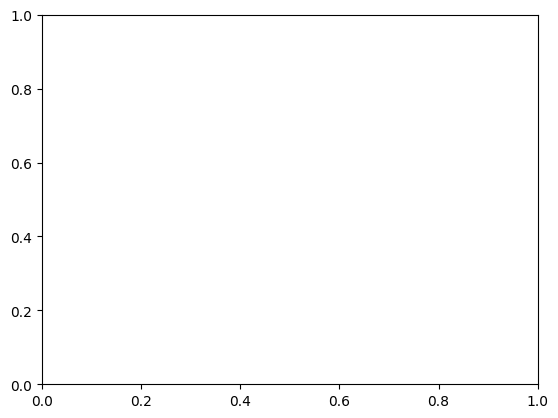

In [13]:
inertia = []
# elbow method to know the number of clusters
for k in tqdm(range(1, 6), desc="Finding optimal k"):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(tfidf)
    inertia.append(kmeans.inertia_)

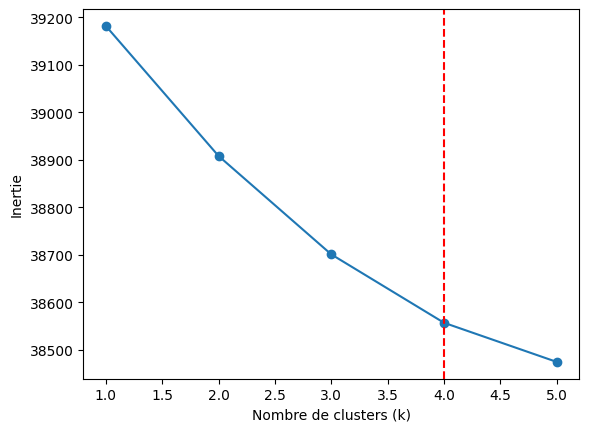

In [16]:
plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.axvline(x=4, color='r', linestyle='--')
plt.ylabel('Inertie')
plt.show()

k = 4 semble bien

In [22]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(tfidf)
cluster_labels = kmeans.labels_
people_data['cluster'] = cluster_labels

c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

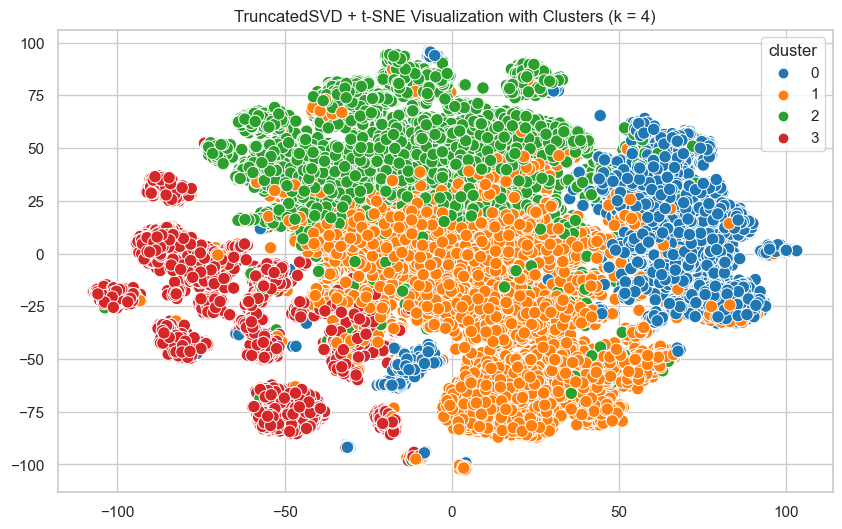

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

# là je fais des diablerie mais jsp trop si c'est bien
svd = TruncatedSVD(n_components=50, random_state=0)
tfidf_svd = svd.fit_transform(tfidf)

tsne = TSNE(n_components=2, random_state=0)
tfidf_2d = tsne.fit_transform(tfidf_svd)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tfidf_2d[:, 0], y=tfidf_2d[:, 1], hue=people_data['cluster'], palette='tab10', legend='full', s=80)
plt.title('TruncatedSVD + t-SNE Visualization with Clusters (k = 4)')
plt.show()